In [1]:
# KNN - K-nearest neighbhours
# in this model the nearest points are searched and the one which too near are choosen as result (eucledian distance is calculate from the point)

# accuracy depends upon the no of nearest neighbours and selected no of neighbor paramater

In [49]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [52]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df['target'] = iris.target

In [55]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [57]:
X = df.drop(['target'],axis=1)
Y = df.target

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [60]:
len(x_train)

120

In [61]:
len(x_test)

30

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
model = KNeighborsClassifier(n_neighbors=3) # 3 nearest neighbor are searched

In [64]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
model.predict(x_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [66]:
model.score(x_test,y_test)

1.0

In [67]:
model1 = KNeighborsClassifier(n_neighbors=10) # 10 nearest neighbor are searched

In [68]:
model1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [69]:
model1.score(x_test,y_test)

0.9666666666666667

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
y_predicted = model1.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

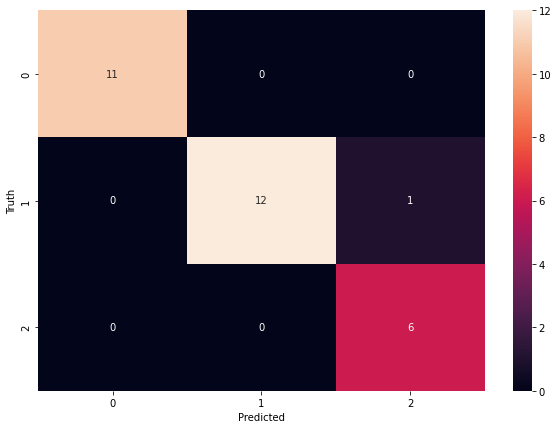

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [73]:
from sklearn.metrics import classification_report
rp = classification_report(y_test,y_predicted)
print(rp)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

